<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/AA_PRACTICA1_GRUPO_2/blob/main/Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

María García Rodríguez

Elena Peral Pastor

Sofía Peña González

Paloma Moya Tudela



# Resumen

# Índice



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias bibliográficas







# Introducción

Las Redes de Neuronas Artificiales son una herramienta muy útil, y cada vez más utilizada, para resolver problemas cotidianos. Sin embargo, están siendo también de gran ayuda para hallar las respuestas a cuestiones increíblemente complejas.

La fuerte componente biológica sobre la que se sustenta llama considerablemente la atención, y es esta característica lo que las hace únicas. 

Sin darnos cuenta, estas redes están siendo implementadas en multitud de campos. Y es que las empresas son capaces de lograr llamativos beneficios gracias a la eficacia de este método; empresas como Zalando, cuyas ventas se van a trabajar a lo largo de este proyecto.

# Resolución

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**
-  Reconocer y clasificar imágenes - en escala de grises - de ropa (28 x 28 píxeles) en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
- Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST: artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes  para evaluar la precisión con la que la red aprende a clasificarlas.

Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código.

In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


Cargamos el conjunto de datos Fashion-MNIST en Keras, ya que será imprescindible como objeto de estudio.

In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- `train_images` (imágenes) y `train_labels` (etiquetas corrrespondientes a las imágenes) son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

Antes de adentrarnos a crear y modificar nuestro modelo, será importante investigar los datos que se han importado, con el fin de familiarizarnos con ellos y comprender su funcionamiento con mayor detalle. De esta manera, a su vez, podremos conocer si los datos tienen la forma esperada.

Comenzaremos con los **datos de entrenamiento**:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# Vemos la matriz de la imagen número 30.000 (28x28)
from pandas import numpy
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

ImportError: ignored

In [ ]:
# La imagen anterior corresponde con el número 3, por lo que será un vestido.
train_labels[30000]

3

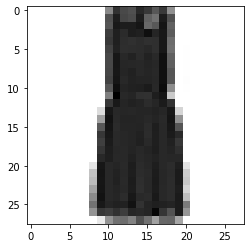

In [ ]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Como habíamos supuesto anteriormente, la imagen corresponde a la de un vestido, al igual que la etiqueta que lo acompaña.

El enunciado afirmaba la existencia de 60k imágenes de entrenamiento, asegurémonos:

In [ ]:
len(train_labels)

60000

Observamos la forma que toman las etiquetas de las imágenes. Efectivamente, comprondrá un array de longitud 60k con el número de clasificación en la posición de la imagen a la que corresponde.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Llevamos a cabo otro ejemplo.

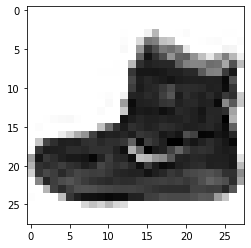

In [ ]:
# Veamos el elemento 0 (que vemos que será un 'ankle boot') y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que nuestro razonamiento era correcto:

In [ ]:
train_labels[0]

9

A continuación, se estudiarán brevemente los **datos de prueba**:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

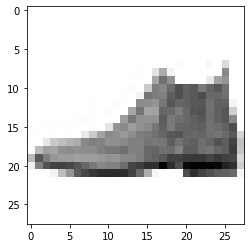

In [ ]:
# Veamos el elemento 0 de test (que vemos que es otra 'ankle boot') y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que nuestro razonamiento era correcto:

In [ ]:
test_labels[0]

9

Por último, durante esta fase de pre procesado de datos, analizaremos el uso de la función de keras.layers.Flatten().

In [ ]:
model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))

NameError: ignored

***1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.***

En este apartado, se dará a la RNA los datos de entrenamiento `train_images` y `train_labels`. Esta aprenderá a asociar imágenes y etiquetas, por lo que pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`.

**CONSTRUIMOS LA RNA**

- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**
    - Las capas extraen **representaciones**  de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión.

In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

network = models.Sequential()

# Caso 1
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))

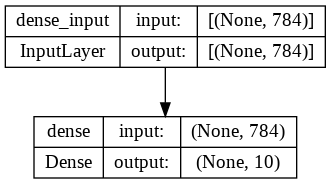

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

A menudo se indica la **inicialización de los pesos** como argumento de las capas `Dense`. Los valores iniciales deben ser adecuados para que el problema de optimización converja tan rápido como sea posible en el proceso de entrenamiento de la red. En el manual de Keras podéis ver diversas opciones de inicialización.

In [ ]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Antes del entrenamiento, **preprocesaremos nuestros datos** dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo `[0, 1]`. Antes, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de forma `(60000, 28, 28)` de tipo `uint8` con valores en el intervalo `[0, 255]`. Lo transformamos en una matriz de forma `float32` con forma `(60000, 28 * 28)` con valores entre 0 y 1.

**NORMALIZACION**

La normalización que vamos a hacer se hacen **para facilitar que converja el proceso de entrenamiento** de la red. En general, para alimentar a redes neuronales, **no se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos**

In [ ]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)


NameError: ignored

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

También tenemos que **codificar categoricamente las etiquetas**. Usaremos el **one-hot encoding**, que en resumen, consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta:

In [ ]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

Ya estamos listos para **entrenar a la red**, lo cual se hace en Keras a través de una llamada al métido `fit` de la red, que **ajusta el modelo a sus datos de entrenamiento**:

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2562 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1029 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0680 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0492 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0380 - accuracy: 0.9881


Debido a que se han ido explicando detalladamente todos los aspectos relevantes generales de la creación de un modelo de Redes de Neuronas Artificiales, se procederá a estudiar los siguientes 7 casos sin tanta generalidad. De esta forma, se centrará la atención en cada modelo concreto, y sus diferencias visibles con otros modelos anteriores ejecutados.

In [ ]:
# Caso 2
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

network = models.Sequential()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, train_labels, epochs=5, batch_size=128)

ValueError: ignored

In [ ]:
# Caso 3
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
# Caso 4
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
# Caso 5
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Caso 6
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Caso 7
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
# Caso 8
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))

***2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos.***

In [ ]:
network.summary()
model.summary()

***3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25).***

***4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba.***

***5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).***

***6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos.***

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)
  
  def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10), predictions_array, color="#777777")
    plt.yticks([])
    thisplot = plt.bar(range(10))
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

***7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.***

# Conclusiones

# Reflexiones

## 1.   Cómo hemos afrontado la solución de la práctica





## 2.   Cómo se ha dividido el trabajo

## 3.   Cómo se ha gestionado el equipo para trabajar

# Referencias bibliográficas

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula